In [1]:
import pandas as pd

In [2]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filme_id", "titulo", "generos"]
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
generos = filmes.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
filme_dados = pd.concat([filmes, generos], axis=1)
filme_dados.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaled_generos = scaler.fit_transform(generos)
scaled_generos.shape

(9742, 20)

In [7]:
from sklearn.cluster import KMeans

In [8]:
modelo = KMeans(n_clusters=3)
modelo.fit(scaled_generos)
print(f"Grupos {modelo.labels_}")

Grupos [0 0 1 ... 1 0 1]


In [9]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.52701988  1.50848553  1.64594423  1.43740635 -0.00865302
  -0.30361493 -0.20974139 -0.6688866   1.1793275  -0.09492563 -0.24303553
   0.6231515   0.24929492 -0.1439877  -0.2904784   0.56958731 -0.418076
  -0.17300586 -0.10107549]
 [ 0.03128468 -0.25674864 -0.24768042 -0.24249968 -0.19200074  0.20146022
  -0.17163986  0.11195046  0.13352241 -0.17795142 -0.08992195 -0.12102374
  -0.10976362  0.01078333 -0.18729702  0.15937682 -0.17584939 -0.48729404
   0.06960787  0.04201073]
 [-0.05917995  0.46151145 -0.1395015  -0.23539898 -0.26485201 -0.59884773
   0.69202924 -0.21295942 -0.00917794 -0.15607699  0.32505415  0.5048812
  -0.03530281 -0.17807889  0.64563528 -0.30792276  0.19411624  1.70517094
  -0

In [10]:
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.527020,1.508486,1.645944,1.437406,-0.008653,-0.303615,-0.209741,-0.668887,1.179328,-0.094926,-0.243036,0.623152,0.249295,-0.143988,-0.290478,0.569587,-0.418076,-0.173006,-0.101075
1,0.031285,-0.256749,-0.247680,-0.242500,-0.192001,0.201460,-0.171640,0.111950,0.133522,-0.177951,-0.089922,-0.121024,-0.109764,0.010783,-0.187297,0.159377,-0.175849,-0.487294,0.069608,0.042011
2,-0.059180,0.461511,-0.139501,-0.235399,-0.264852,-0.598848,0.692029,-0.212959,-0.009178,-0.156077,0.325054,0.504881,-0.035303,-0.178079,0.645635,-0.307923,0.194116,1.705171,-0.107509,-0.066838


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff505598898>,
      dtype=object)

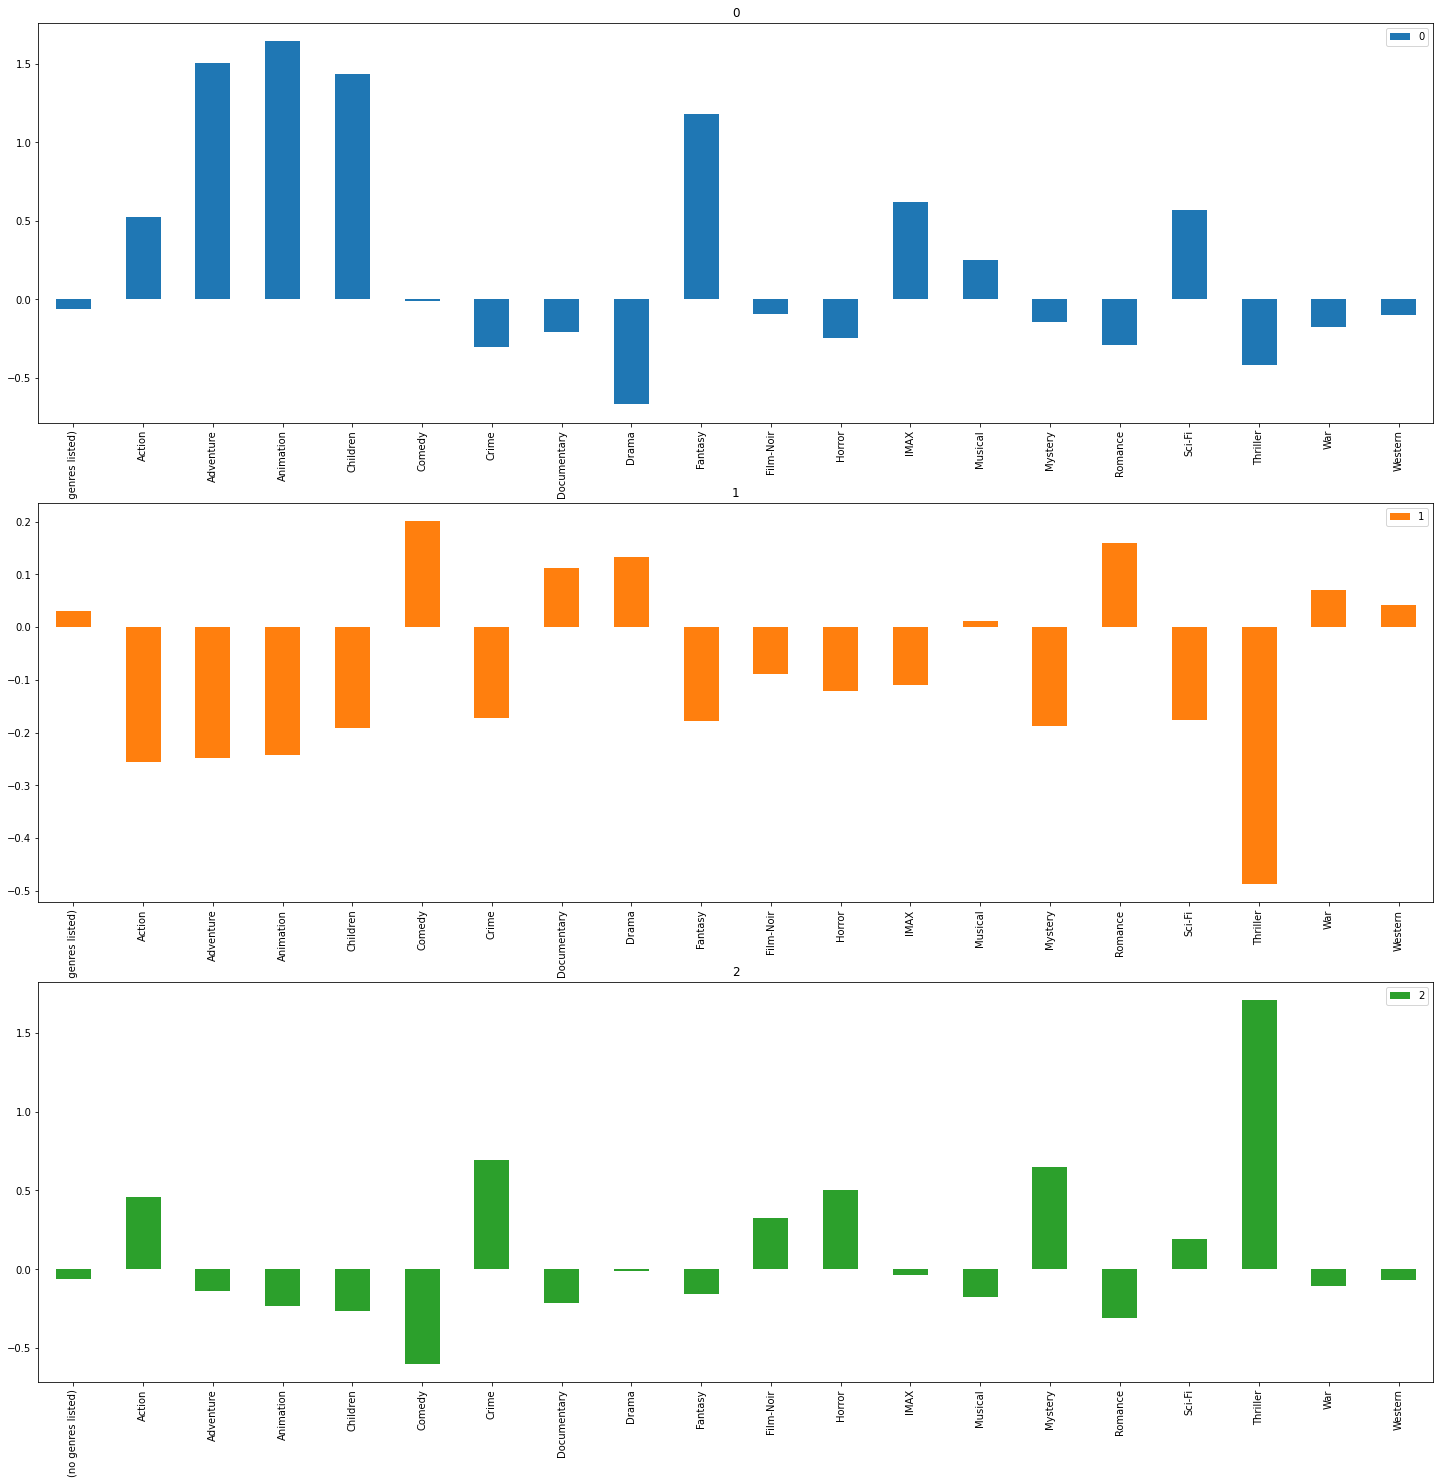

In [15]:
grupos.transpose().plot.bar(subplots=True, figsize=(25,25), sharex=False)

In [18]:
grupo = 1
filtro = modelo.labels_ == grupo
filme_dados[filtro]

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Sabrina (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8,9,Sudden Death (1995),Action,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9733,193567,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9734,193571,Silver Spoon (2014),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9736,193579,Jon Stewart Has Left the Building (2015),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
